In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
data = load_breast_cancer()
X, y = data.data, data.target


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [27]:
pca = PCA(n_components=0.80) 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
svc_orig = SVC()
svc_orig.fit(X_train, y_train)

SVC()

In [29]:
svc_pca = SVC()
svc_pca.fit(X_train_pca, y_train)

SVC()

In [30]:
y_pred_orig = svc_orig.predict(X_test)
y_pred_pca = svc_pca.predict(X_test_pca)

acc_orig = accuracy_score(y_test, y_pred_orig)
acc_pca = accuracy_score(y_test, y_pred_pca)

cm_orig = confusion_matrix(y_test, y_pred_orig)
cm_pca = confusion_matrix(y_test, y_pred_pca)

print(f" Original Accuracy: {acc_orig:.2f}")
print(f" PCA Accuracy: {acc_pca:.2f}")
print(f" PCA Components Chosen: {pca.n_components_}")

 Original Accuracy: 0.97
 PCA Accuracy: 0.96
 PCA Components Chosen: 5


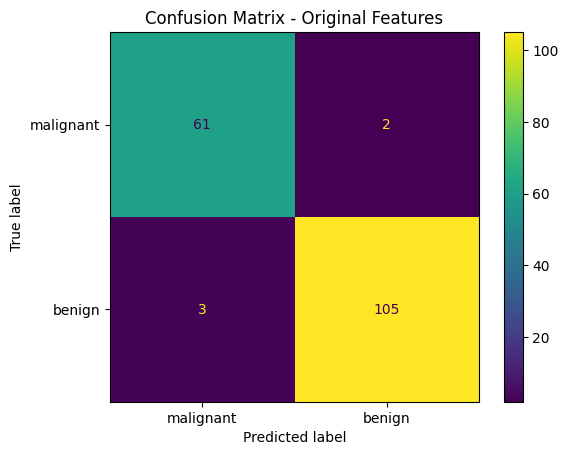

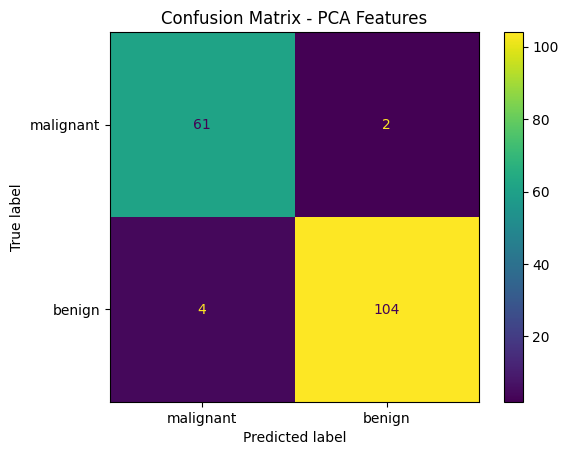

In [31]:
ConfusionMatrixDisplay(cm_orig, display_labels=data.target_names).plot()
plt.title("Confusion Matrix - Original Features")
plt.show()

ConfusionMatrixDisplay(cm_pca, display_labels=data.target_names).plot()
plt.title("Confusion Matrix - PCA Features")
plt.show()


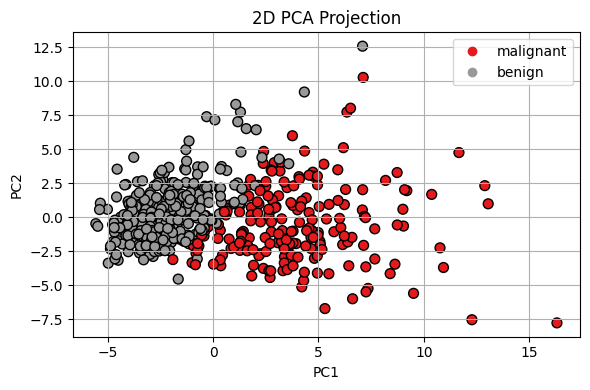

In [32]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='Set1', edgecolor='k', s=50)
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=data.target_names.tolist())
plt.title("2D PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()